# Analisi COVID19

Questo notebook è pensato per chi vuole essere aggiornato sull'andamento dei contagi della malattia COVID19 in Italia. I dati utilizzati sono raccolti da [questo sito](https://github.com/pcm-dpc).

## Caricamento dati 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams

# Arial, default font
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator(interval=2) # every day
years_fmt = mdates.DateFormatter('%d-%m-%Y')


In [51]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
df = pd.read_csv(url)
df.to_csv('dati_andamento_nazionale')
print( 'Dati aggiornati al giorno ', df['data'].iloc[-1])
df.head()

Dati aggiornati al giorno  2020-11-01T17:00:00


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


In [52]:
# colonna giorno
df['giorno'] = df['data'].str.slice(start=0, stop=10)

primo_giorno = df['giorno'].iloc[0]
ultimo_giorno = df['giorno'].iloc[-1]

giorni = pd.date_range(start=primo_giorno, end=ultimo_giorno, freq='D')
df['giorno']=giorni

In [53]:
# colonna nuovi tamponi
df['nuovi_tamponi'] = df['tamponi'].diff()
# colonna nuovi guariti
df['nuovi_guariti'] = df['dimessi_guariti'].diff()
# colonna nuovi deceduti
df['nuovi_deceduti'] = df['deceduti'].diff()

df

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,giorno,nuovi_tamponi,nuovi_guariti,nuovi_deceduti
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,NaN,NaN,229,4324,NaN,NaN,2020-02-24,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,NaN,NaN,322,8623,NaN,NaN,2020-02-25,4299.0,0.0,3.0
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,NaN,NaN,400,9587,NaN,NaN,2020-02-26,964.0,2.0,2.0
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,NaN,NaN,650,12014,NaN,NaN,2020-02-27,2427.0,42.0,5.0
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,NaN,NaN,888,15695,NaN,NaN,2020-02-28,3681.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-10-28T17:00:00,ITA,14981,1536,16517,259940,276457,21367,24991,275404,...,406130.0,183636.0,589766,15152038,9197638.0,NaN,2020-10-28,198952.0,3416.0,205.0
248,2020-10-29T17:00:00,ITA,15964,1651,17615,281576,299191,22734,26831,279282,...,421834.0,194761.0,616595,15353490,9316495.0,NaN,2020-10-29,201452.0,3878.0,217.0
249,2020-10-30T17:00:00,ITA,16994,1746,18740,307046,325786,26595,31084,283567,...,439297.0,208377.0,647674,15568575,9446183.0,NaN,2020-10-30,215085.0,4285.0,199.0
250,2020-10-31T17:00:00,ITA,17966,1843,19809,331577,351386,25600,31758,289426,...,460502.0,218928.0,679430,15784461,9578462.0,NaN,2020-10-31,215886.0,5859.0,297.0


In [54]:
# funzione grafici
def Set_graphix(ax, legend=True):
    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(days)

    plt.sca(ax)
    plt.xticks(fontsize='large')

    # round to nearest days.
    datemin = np.datetime64(primo_giorno, 'D')-1
    datemax = np.datetime64(ultimo_giorno, 'D') +5
    ax.set_xlim(datemin, datemax)
    
    ax.grid(True)

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate(ha='center')
 
    #set legend
    if legend:
        ax.legend(fontsize='x-large', loc='upper left' )

## Andamento contagi

Confrontiamo l'andamento dei contagi con guariti e decessi.

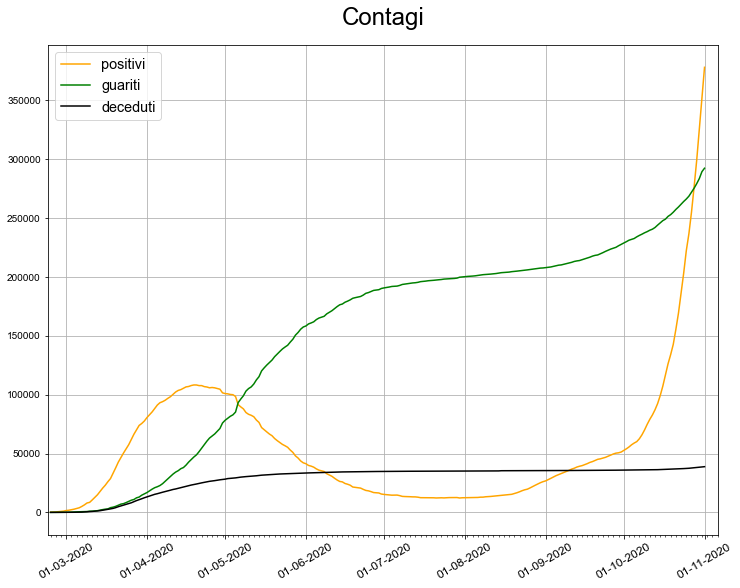

In [55]:
# dati
positivi = df['totale_positivi']
guariti = df['dimessi_guariti']
deceduti = df['deceduti']
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(giorni, positivi,'orange', label='positivi' )
ax.plot(giorni, guariti, 'green', label='guariti')
ax.plot(giorni, deceduti, 'black', label='deceduti')
ax.set_title('Contagi', fontsize=24, pad=20 )

Set_graphix(ax)

plt.show()

## Confronto ricoverati-isolamento

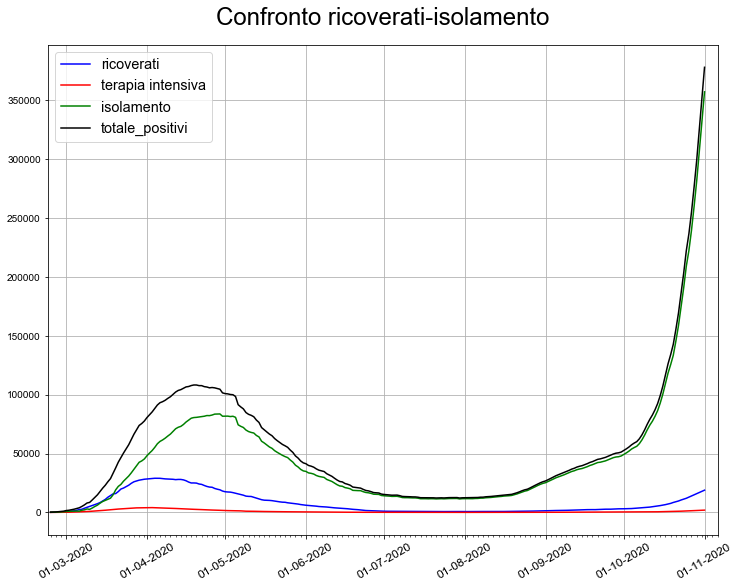

Dati attuali
Positivi: 378129
Isolamento: 357288
Ricoverati: 18902
Terapia intensiva: 1939


In [56]:
#dati
ricoverati = df['ricoverati_con_sintomi']
ric_gravi = df['terapia_intensiva']
isolamento = df['isolamento_domiciliare']
ric_totali = df['totale_ospedalizzati']

#plot
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(giorni, ricoverati, 'b', label='ricoverati')
ax.plot(giorni, ric_gravi, 'r', label='terapia intensiva')
ax.plot(giorni, isolamento, 'g', label='isolamento')
ax.plot(giorni, positivi, 'black', label='totale_positivi')
ax.set_title('Confronto ricoverati-isolamento', fontsize=24, pad=20 )
Set_graphix(ax)
plt.show()

print('Dati attuali' )
print( 'Positivi: {}'.format(positivi[len(positivi)-1]))
print( 'Isolamento: {}'.format(isolamento[len(isolamento)-1]))
print( 'Ricoverati: {}'.format(ricoverati[len(ricoverati)-1]))
print( 'Terapia intensiva: {}'.format(ric_gravi[len(ric_gravi)-1]))

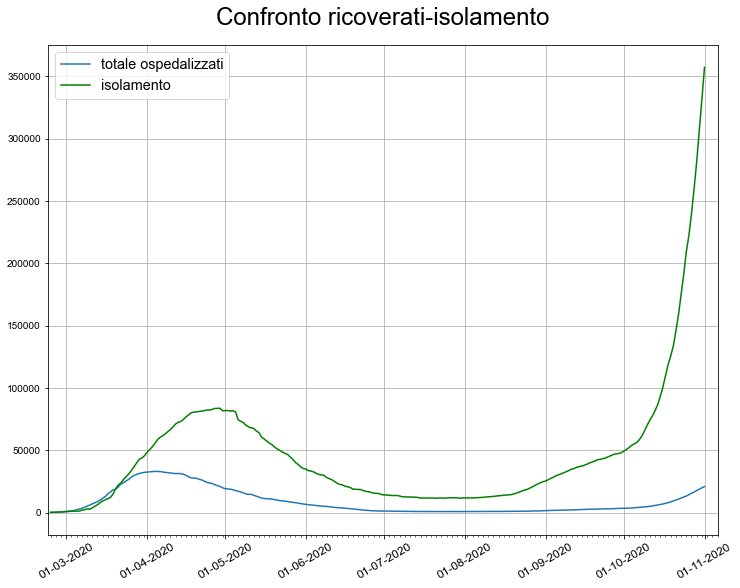

In [57]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(giorni, ric_totali, label='totale ospedalizzati')
ax.plot(giorni, isolamento, 'g', label='isolamento')
ax.set_title('Confronto ricoverati-isolamento', fontsize=24, pad=20 )
Set_graphix(ax)
plt.show()

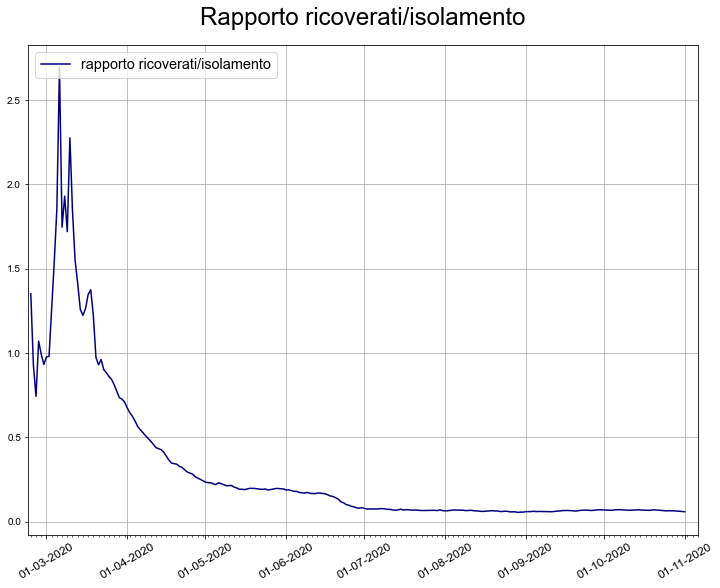

In [58]:
frazione_ric = ric_totali/isolamento
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(giorni, frazione_ric, 'navy', label='rapporto ricoverati/isolamento')
ax.set_title('Rapporto ricoverati/isolamento', fontsize=24 , pad=20)
Set_graphix(ax)
plt.show()

## Confronto tamponi-positivi

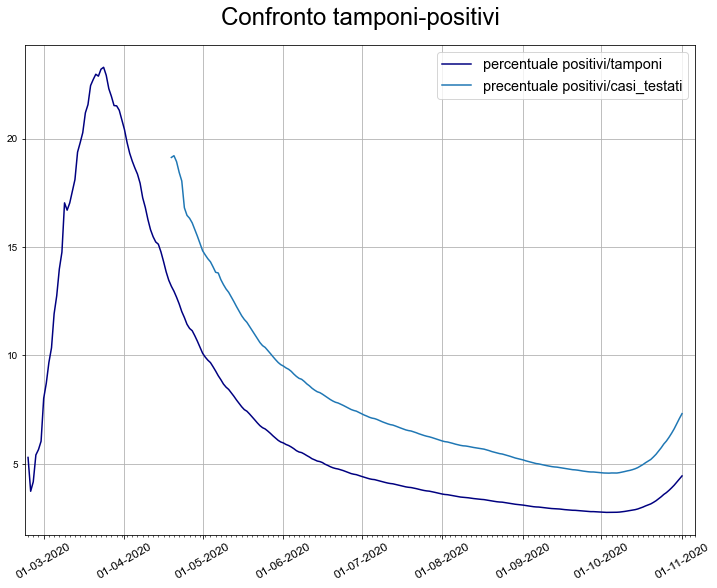

Probabilità tampone positivo:  4.442251018573618 %
Probabilità caso positivo:  7.3157940333789195 %


In [59]:
#dati
tamponi = df['tamponi']
totale_casi = df['totale_casi']
fraz1 = totale_casi/tamponi*100

casi_testati = df['casi_testati']
fraz2 = totale_casi/casi_testati*100

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(giorni, fraz1, color='navy', label='percentuale positivi/tamponi', )
ax.plot(giorni, fraz2, label='precentuale positivi/casi_testati')
ax.set_title('Confronto tamponi-positivi', fontsize=24, pad=20 )
Set_graphix(ax)
ax.legend(loc='upper right', fontsize='x-large')
plt.show()


print( 'Probabilità tampone positivo: ', fraz1[len(fraz1)-1],'%')
print( 'Probabilità caso positivo: ', fraz2[len(fraz2)-1],'%')

## Confronto aumento tamponi/posotivi

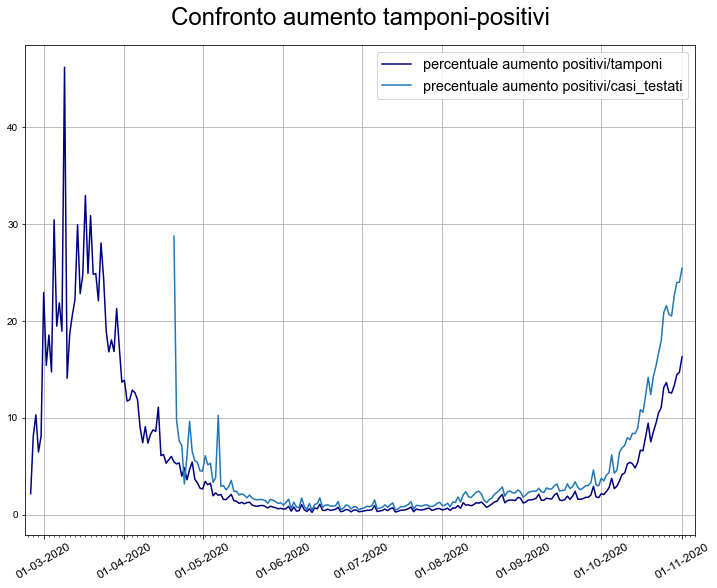

Probabilità tampone positivo: 16.3%
Probabilità caso positivo: 25.46%


In [60]:
#dati
nuovi_positivi = df['nuovi_positivi']

aumento_tamponi = df['tamponi'].diff()
fraz1 = nuovi_positivi/aumento_tamponi*100

aumento_casi_testati = df['casi_testati'].diff()
fraz2 = nuovi_positivi/aumento_casi_testati*100

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(giorni, fraz1, 'navy', label='percentuale aumento positivi/tamponi')
ax.plot(giorni, fraz2, label='precentuale aumento positivi/casi_testati')
ax.set_title('Confronto aumento tamponi-positivi', fontsize=24, pad=20 )
Set_graphix(ax)
ax.legend(loc='upper right', fontsize='x-large')
plt.show()


print( 'Probabilità tampone positivo: {}%'.format(np.around(fraz1[len(fraz1)-1], 2)))
print( 'Probabilità caso positivo: {}%'.format(np.around(fraz2[len(fraz2)-1], 2)))

## Variazione e nuovi positivi

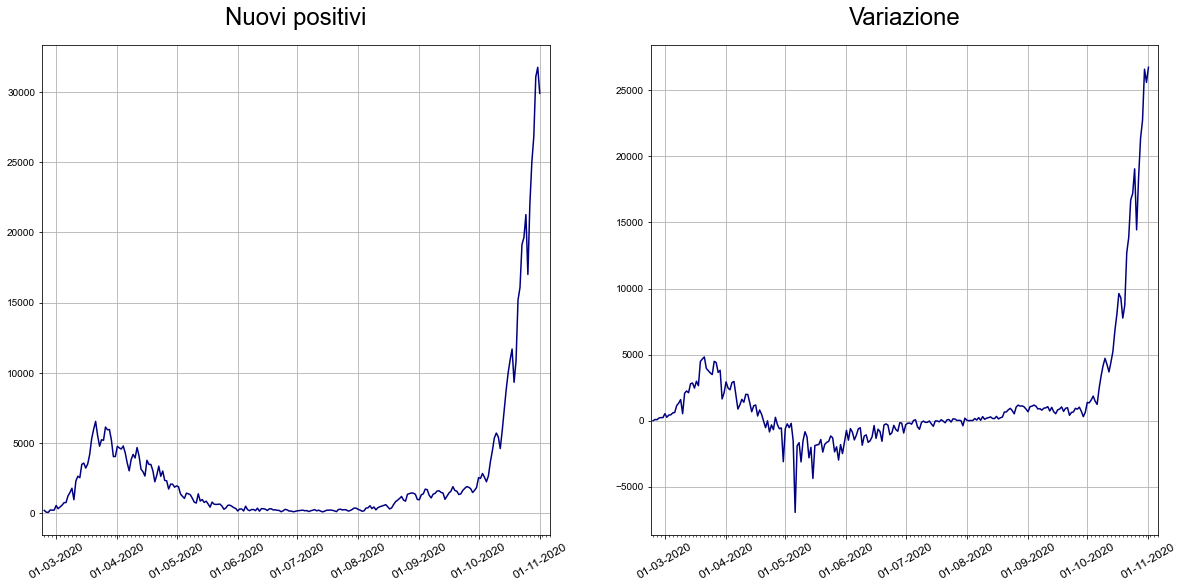

In [61]:
#dati
variazione = df['variazione_totale_positivi']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.plot(giorni, nuovi_positivi, 'navy')
ax1.set_title('Nuovi positivi', fontsize=24, pad=20)

Set_graphix(ax1, legend=False)

ax2.plot(giorni, variazione, 'navy')
ax2.set_title('Variazione', fontsize=24, pad=20)
Set_graphix(ax2, legend=False)

plt.show()


### Nuovi guariti e nuovi deceduti

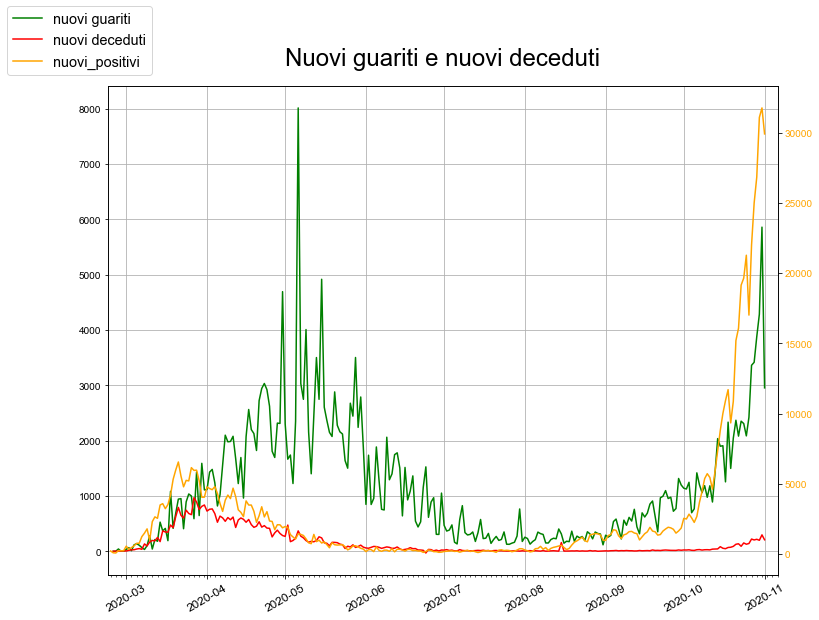

In [62]:
#dati 
nuovi_guariti = df['nuovi_guariti']
nuovi_deceduti = df['nuovi_deceduti']

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(giorni, nuovi_guariti, 'g', label='nuovi guariti')
ax.plot(giorni, nuovi_deceduti, 'r', label='nuovi deceduti')
#ax.plot(giorni, nuovi_positivi, 'orange', label='nuovi positivi')
ax.set_title('Nuovi guariti e nuovi deceduti', fontsize=24, pad=20)

Set_graphix(ax, legend=False)

ax2 = ax.twinx()
ax2.plot(giorni, nuovi_positivi, 'orange', label='nuovi_positivi')
ax2.tick_params(axis='y', labelcolor='orange')

fig.legend(loc='upper left', fontsize='x-large')

plt.show()